In [1]:
import geopandas as gpd
from pathlib import Path
import pandas as pd

<Axes: >

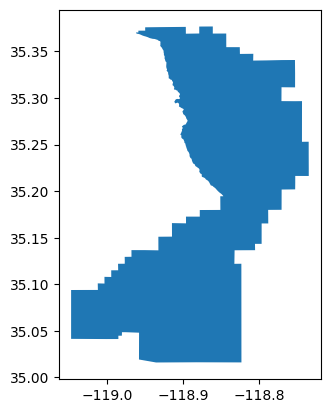

In [28]:
full_gdf = gpd.read_parquet("data\\gdf-2023-08-15.parquet")
# service_boundary = full_gdf.pipe(lambda df:df.loc[df['label'] == "Frick Unit North Service Area"])
service_boundary = full_gdf.pipe(lambda df:df.loc[df['layer'] == "District Boundary"])
service_boundary.plot()

In [30]:
gdf = gpd.read_file(
    r"Z:\GIS_Library\County\Kern\Kern_Parcels_Owners.shp",
    # bbox=service_boundary.total_bounds,
	bbox=service_boundary,
).rename(columns={
    "APN": "APN_number",
    "APN_LABEL": "APN",
    "SHAPE_ACRE": "Acreage",
    "ASSE_NAME": "GIS Landowner",
}).to_crs("EPSG:4326")

In [35]:
service_boundary.crs
apns.crs

<Derived Projected CRS: EPSG:2229>
Name: NAD83 / California zone 5 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Kern; Los Angeles; San Bernardino; San Luis Obispo; Santa Barbara; Ventura.
- bounds: (-121.42, 32.76, -114.12, 35.81)
Coordinate Operation:
- name: SPCS83 California zone 5 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

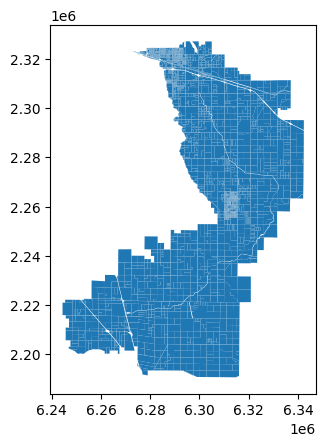

In [37]:
apns = gdf[gdf.intersects(service_boundary.to_crs(gdf.crs).unary_union)]
# ax = service_boundary.plot(color="red")
# gdf.plot(ax=ax, color="none", edgecolor="blue")
# gdf.head(2)
apns.plot()

In [38]:
updated_owners = pd.read_excel(
	r"\\ppeng.com\pzdata\clients\Arvin-Edison WSD-1215\121523003-Frick Unit Pipeline\100 Correspo\130 Incoming\Landowner_Parcel Contact List\APN AG USER LIST.xlsx",
	sheet_name="APN AG USER"
)
updated_owners['APN_DASH'] = updated_owners['APN_D'].str[:-5]
apn_map = {row["APN_DASH"]:row["OWNERNAME"] for i,row in updated_owners.iterrows()}

gdf['Parcelquest Landowner'] = gdf['APN_DASH'].map(apn_map)
gdf['Landowner'] = gdf['Parcelquest Landowner'].fillna(gdf['GIS Landowner'])
gdf = gdf.rename(columns={
		'APN_DASH':'APN',
		'ASSR_ACRES':'Acreage',
		# 'GIS Landowner':'Landowner',
	})

gdf['label'] = [
	f"APN: {y['APN']}\nArea: {y['Acreage']} acres\nLandowner: {y['Landowner']}" for i,y in gdf.iterrows()
]
gdf.to_clipboard()
gdf.to_parquet("data\\apns.parquet")

In [4]:
# gdf = gpd.read_file(
#     r"Z:\GIS_Library\County\Kern\Kern_Parcels.shp",
#     bbox=service_boundary.total_bounds,
# 	# bbox=service_boundary,
# )
# gdf.to_parquet("data\\apns.parquet")

In [ ]:

# file = r"Z:\GIS_Library\County\Kern\Kern_Parcels.shp".replace(
#     "Z:",
#     r"\\ppeng.com\pzdata\gis",
#     )
# print(file)
# gdf = gpd.read_file(
#     file,
#     # bbox=service_boundary.total_bounds,
# 	bbox=service_boundary,
# )
# # gdf = gdf.to_crs("EPSG:4326")
# ax = service_boundary.plot(color="red")
# gdf.plot(ax=ax, color="none", edgecolor="blue")

<Axes: >

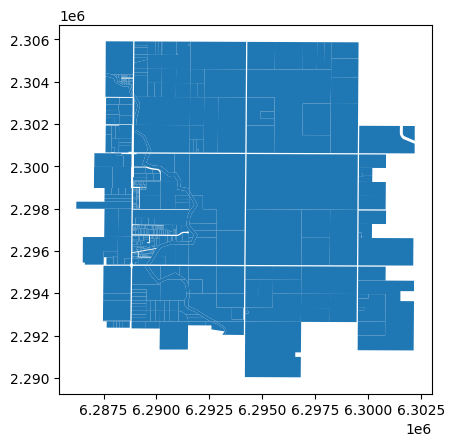

In [14]:
# updated_owners['APN_D'].str[:-5]
gdf.plot()

In [6]:
# gdf['APN_DASH'].iloc[0]
# gdf.head(2)

In [7]:
# gdf.to_parquet("data\\apns.parquet")

In [23]:
apn_gdf = gpd.read_parquet("data\\apns.parquet")
apn_gdf.to_clipboard()
apn_gdf.head(2)

,APN_number,APN9,APN,SHAPE_SQFT,Acreage,OID_,TE_NO,APN9_1,ATN,ROLL,...,CITRUS_AC,APN_1,Community,Systm_Name,PWSID,MapUse,geometry,label,GIS Landowner,Parcelquest Landowner
0,17401101,174011015,174-011-01,834483,19.16,113757,129869.0,174011015,17401101010,1,...,0.0,174011015,NaN,NaN,NaN,NaN,"POLYGON ((6288809.845 2296669.267, 6288181.769...",APN: 174-011-01\nArea: 19.16 acres\nLandowner:...,GIUMARRA BROS FRUIT CO,None
1,17401102,174011023,174-011-02,866279,19.89,113758,129871.0,174011023,17401102013,1,...,0.0,174011023,NaN,NaN,NaN,NaN,"POLYGON ((6288195.979 2297994.001, 6288181.769...",APN: 174-011-02\nArea: 19.89 acres\nLandowner:...,GIUMARRA BROS FRUIT CO,None


APN rename

In [14]:
updated_owners = pd.read_excel(
    r"\\ppeng.com\pzdata\clients\Arvin-Edison WSD-1215\121523003-Frick Unit Pipeline\100 Correspo\130 Incoming\Landowner_Parcel Contact List\APN AG USER LIST.xlsx",
    sheet_name="APN AG USER"
)
updated_owners['APN'] = updated_owners['APN_D'].str[:-5]
apn_map = {row["APN"]:row["OWNERNAME"] for i,row in updated_owners.iterrows()}
apn_gdf['GIS Landowner'] = apn_gdf['Landowner']

apn_gdf['Parcelquest Landowner'] = apn_gdf['APN'].map(apn_map)
apn_gdf['Landowner'] = apn_gdf['GIS Landowner'].fillna(apn_gdf['Landowner'])
apn_gdf.to_clipboard()

In [15]:
apn_gdf.head(2)

,APN_number,APN9,APN,SHAPE_SQFT,Acreage,OID_,TE_NO,APN9_1,ATN,ROLL,...,APN_1,Community,Systm_Name,PWSID,MapUse,geometry,label,GIS Landowner,Parcelquest Landowner,Updated Landowner
0,17401101,174011015,174-011-01,834483,19.16,113757,129869.0,174011015,17401101010,1,...,174011015,NaN,NaN,NaN,NaN,"POLYGON ((6288809.845 2296669.267, 6288181.769...",APN: 174-011-01\nArea: 19.16 acres\nLandowner:...,GIUMARRA BROS FRUIT CO,NaN,GIUMARRA BROS FRUIT CO
1,17401102,174011023,174-011-02,866279,19.89,113758,129871.0,174011023,17401102013,1,...,174011023,NaN,NaN,NaN,NaN,"POLYGON ((6288195.979 2297994.001, 6288181.769...",APN: 174-011-02\nArea: 19.89 acres\nLandowner:...,GIUMARRA BROS FRUIT CO,NaN,GIUMARRA BROS FRUIT CO


In [4]:
# gdf=gpd.read_file(r"G:\Arvin-Edison WSD-1215\121519004-FFP Frick Unit\GIS\Feature\Laterals\Frick_NorthSouth_Laterals.shp")
# gdf=gpd.read_file(r"G:\Arvin-Edison WSD-1215\121519005-DiGiorgio Unit\GIS\Feature\AEWSD_Alignments.shp")
# gdf.head(2)


## Pipelines

In [16]:
pipe_gdf = gpd.read_file(r"data\shps\AEWSD_frick_pipelines.shp",)
# pipe_gdf['Label'] = "Diameter: " + pipe_gdf['Diameter'].astype(str) + '"'
pipe_gdf['label'] = pipe_gdf['Name'].str.replace("O","0") + " - " + pipe_gdf['Diameter'].astype(str) + '"'
pipe_gdf['label']

0      N0 - 42"
1    N0-A - 18"
2    N0-B - 21"
3    N0-C - 18"
4    N0-1 - 12"
5      N0 - 30"
6      N0 - 27"
7      N0 - 12"
8      N0 - 42"
Name: label, dtype: object

## Other layers

In [3]:

layers = {
	"Proposed Pipeline":{
		# "gdf":pipe_gdf,
		"color":"orange",
		"label":"label",
	},

	"District Boundary":{
		"shp":r"\\ppeng.com\pzdata\clients\Arvin-Edison WSD-1215\121519004-FFP Frick Unit\GIS\Feature\From_AE\AEWSD_New_boundary",
		"color":"black",
		"label":"WDNAME",
	},
	"AEWSD North Canal":{
		"shp":r"\\ppeng.com\pzdata\clients\Arvin-Edison WSD-1215\121519004-FFP Frick Unit\GIS\Feature\From_AE\District_canal",
		"color":"blue",
		"label":"CANAL",
	},
	"FFPPP Discharge Pipeline":{
		"shp":r"\\ppeng.com\pzdata\clients\Arvin-Edison WSD-1215\121519004-FFP Frick Unit\GIS\Feature\From_AE\FFPP_discharge_pipeline",
		"color":"red",
		"label":"CANAL",
	},
	"Frick Unit Service Area":{
		"shp":r"G:\Arvin-Edison WSD-1215\121519005-DiGiorgio Unit\GIS\Feature\proposed_SWSAs",
		"color":"red",
		"label":"Name",
	},
	"Proposed Turnout":{
		# "gdb":r"Z:\GIS_Library\_Clients\ArvinEdison_WSD.gdb",
		"gdb":r"\\ppeng.com\pzdata\gis\GIS_Library\_Clients\ArvinEdison_WSD.gdb",
		"layer":"turnouts",
		"color":"yellow",
		"label":"TURNOUT__",
	},
}


In [4]:
import pandas as pd
pd.DataFrame(layers).to_clipboard()

In [5]:

def get_layer(name,info):
	if "shp" in info:
		gdf = gpd.read_file(Path(info["shp"]))
		
	elif "gdb" in info:
		gdb = Path(info["gdb"])
		gdf = gpd.read_file(gdb,layer=info["layer"])
	elif "gdf" in info:
		gdf = info["gdf"]
	
	gdf["color"] = info["color"]
	# gdf["label"] = gdf[info["label"]].astype(str)
	gdf["label"] = gdf[info["label"]].astype(str)


	gdf["layer"] = name
	print(name)
	print(gdf.crs)
	
	
	return gdf[['color','label',"layer","geometry"]]#.to_crs(epsg=4326)

# Create gdb
gdfs = {name:get_layer(name,info) for name,info in layers.items()}

UnboundLocalError: local variable 'gdf' referenced before assignment

In [25]:
gdfs.keys()
# gdfs['AEWSD Alignments'].head(2)

dict_keys(['Proposed Pipeline', 'District Boundary', 'AEWSD North Canal', 'FFPPP Discharge Pipeline', 'Frick Unit Service Area', 'Proposed Turnout'])

In [19]:
gdfs['Proposed Pipeline'].head(2)

,color,label,layer,geometry
0,orange,"N0 - 42""",Proposed Pipeline,"LINESTRING Z (6296911.508 2304590.809 0.000, 6..."
1,orange,"N0-A - 18""",Proposed Pipeline,"LINESTRING Z (6296914.875 2304574.529 0.000, 6..."


In [20]:
epsg = 4326
# epsg = 26745
# epsg = 2229
# epsg = 6424
gdf = pd.concat([gdf.to_crs(epsg=epsg) for gdf in gdfs.values()])
gdf.to_parquet("data\\gdf.parquet")

In [16]:
# gdf

In [2]:
names = list(gdfs.keys())
from IPython.display import display
for name in names:
	print(name)
	gdf = gdfs[name]
	display(gdf.head())
	display(gdf.plot(color=layers[name]["color"]).figure)
	

NameError: name 'gdfs' is not defined